In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import matplotlib.pyplot as plt
import geopandas as gpd
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/calendar.csv
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/listings.csv
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/._reviews.csv
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/._listings_2.csv
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/neighbourhoods.geojson
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/._neighbourhoods.csv
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/listings_2.csv
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/._listings.csv
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/reviews.csv
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/._neighbourhoods.geojson
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/._calendar.csv
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/neighbourhoods.csv
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/._reviews_2.csv
/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/reviews_2.csv


In [2]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count()
use_cuda = True
use_cuda = False if not use_cuda else torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')
torch.cuda.get_device_name(device) if use_cuda else 'cpu'
print('Using device', device)

Using device cuda:0


# Extracing the data

In [3]:
listing_data = pd.read_csv('/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/listings.csv', encoding="latin1")
listing_details_data = pd.read_csv('/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/listings_2.csv' , encoding="latin1")
review_data = pd.read_csv('/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/reviews.csv' , encoding="latin1")
geo_data = gpd.read_file('/kaggle/input/barcelona-airbnb/barcelona_airbnbdata/neighbourhoods.geojson')

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


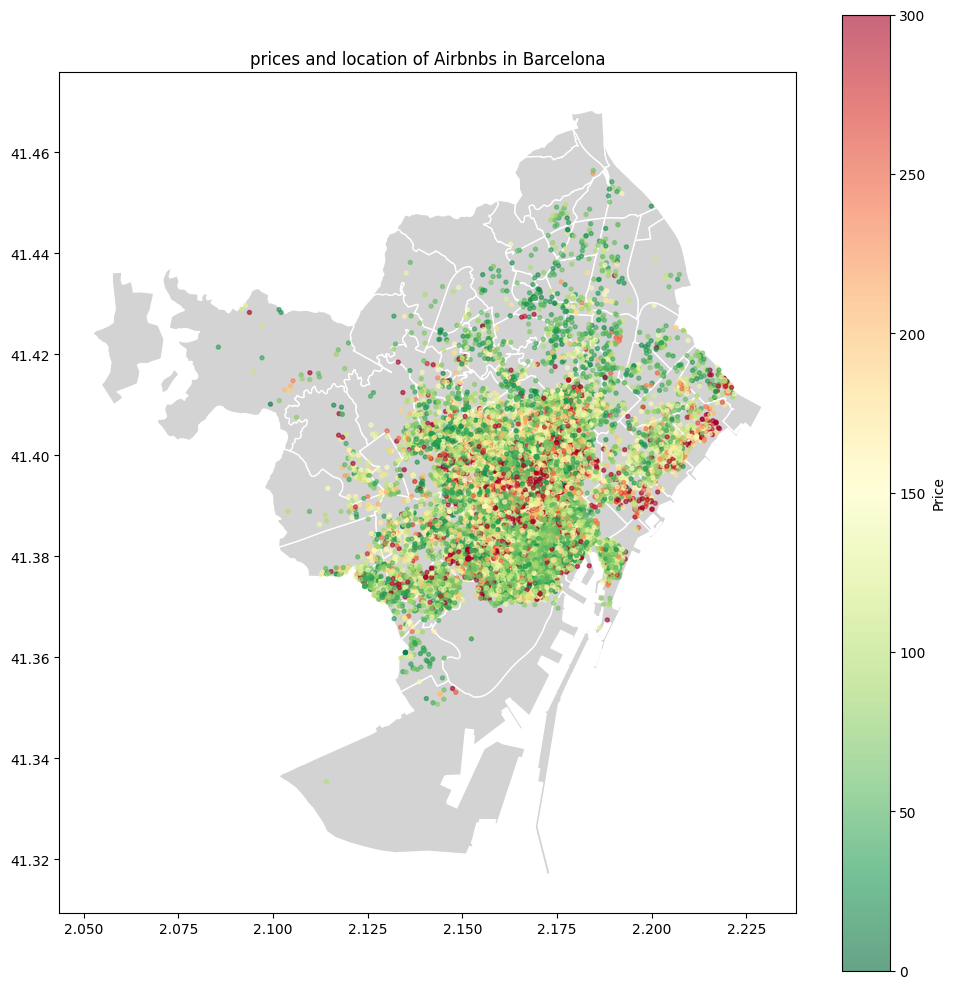

In [4]:
#visualizing the data
longitudes = listing_data["longitude"]
latitudes = listing_data["latitude"]
prices = listing_data["price"]

fig, ax = plt.subplots(figsize=(10, 10))
geo_data.plot(ax=ax, color='lightgrey', edgecolor='white')

sc = ax.scatter(
    listing_data["longitude"],
    listing_data["latitude"],
    c=listing_data["price"],
    cmap='RdYlGn_r',
    s=8,
    vmin=0,
    vmax=300,
    alpha=0.6
)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Price')

ax.set_title("prices and location of Airbnbs in Barcelona")
plt.tight_layout()
plt.show()

### Cleaning and merging the data

In [5]:
#remove redundant data
rows_to_remove = []